# Clusterização dos dados usando K-Means após Redução de Dimensionalidade com PCA utilizando Pipelines do Scikit-Learn

In [1]:
# Importando a biblioteca
import pandas as pd
import os

# Definindo a quantidade de THREADS a ser utilizada pelo KMeans
# Obs.1: suprimindo o aviso de falha de vazamento de memória do windows quando está utilizando o algoritmo KMeans 
# Obs.2: basicamente acontece quando o computador possui mais de um núcleo de processamento, dependendo da versão do Scikit-learn
os.environ["OMP_NUM_THREADS"] = "1"

# Definindo uma contante com o caminho para carregar o arquivo csv 
DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

# Carregando o arquivo csv e criando o DataFrame
df = pd.read_csv(DADOS)

# Exibindo as 5 primeiras linhas do DataFrame
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# 1) Fazendo o pré-processamento

#### Conforme o Pandas Profiling Report:
- Temos 01 Coluna Categórica e portanto utilizaremos o OneHotEncoder;
- Temos 03 Colunas Numéricas e portanto utilizaremos o StandardScaler (para os casos de comportamento da Curva Normal);

In [2]:
# Importando as bibliotecas 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Aplicando as transformações (pré-processamento) às Colunas e atribuindo à variável "preprocessing"
# Obs.1: passando uma lista com uma tupla que contém com o nome da etapa, quem vai fazer a transformação e a lista das colunas; e 
# Obs.2: a outra tupla que contém o nome da etapa, quem vai fazer a transformação e o nome da coluna
preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

## 2) Fazendo a redução de dimensionalidade usando o PCA
- Executando o pré-processamento, a redução de dimensionalidade (PCA) e a clusterização dentro do Pipeline

In [3]:
# Importando as bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Criando a constante 
RANDOM_STATE = 42

# Utilizando o Construtor de Pipeline, passando como parâmetros uma Lista contendo 3 Tuplas com as Etapas e atribuindo à variável "pipeline"
# Obs.1: passando na primeira tupla a etapa de preprocessing e a variável "preprocessing"
# Obs.2: passando na segunda tupla a etapa de redução de dimensionalidade o algoritmo PCA e os parâmetros
# Obs.3: passando na terceira tupla a etapa de clusterização, o algoritmo KMeans e os parâmetros
pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components = 3, random_state = RANDOM_STATE)),
        ("clustering", KMeans(n_clusters = 5, random_state = RANDOM_STATE, n_init = 10))
    ]
)

# Fazendo o fit do DataFrame
pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

### Salvando/Exportando o Modelo

In [4]:
# Importando a biblioteca
import joblib

# Salvando/Exportando para a Pasta Modelo
joblib.dump(pipeline, "../modelos/pipeline_preprocessing_pca_clustering.pkl")

['../modelos/pipeline_preprocessing_pca_clustering.pkl']

### Verificando os resultados obtidos pelo Pipeline

In [5]:
# Visualizando os nomes de saída das colunas/features
# Obs.: O algoritmo KMenas retornou 5 Clusters
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [6]:
# Visualizando os labels (Clusters) da etapa de clustering
pipeline["clustering"].labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [7]:
# Criando uma cópia do DataFrame Original
df_clustered = df.copy()

# Criando uma coluna "cluster" e preenchendo com os valores recebidos de pipeline["clustering"].labels_
df_clustered["cluster"] = pipeline["clustering"].labels_

# Exibindo as 5 primeiras linhas do DataFrame
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


# 3) Gerando as Visualizações

- Construindo gráficos PAIRPLOT's e BOXPLOT's

## Pairplot's

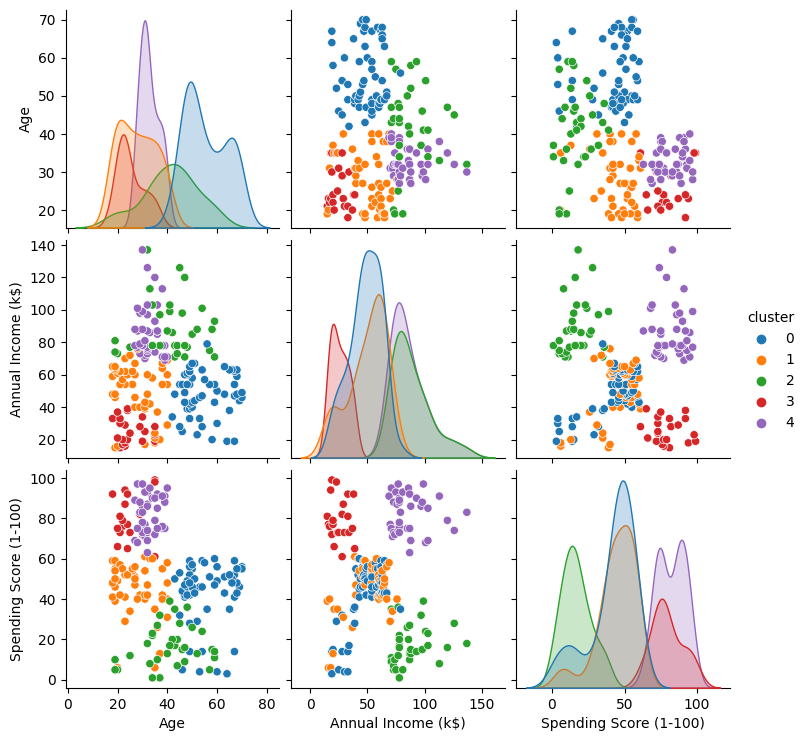

In [8]:
# Importando a biblioteca
import seaborn as sns

# Plotando pairplot do tipo kde nas diagonais
sns.pairplot(df_clustered, diag_kind = "kde", hue = "cluster", palette = "tab10");

## Boxplot's

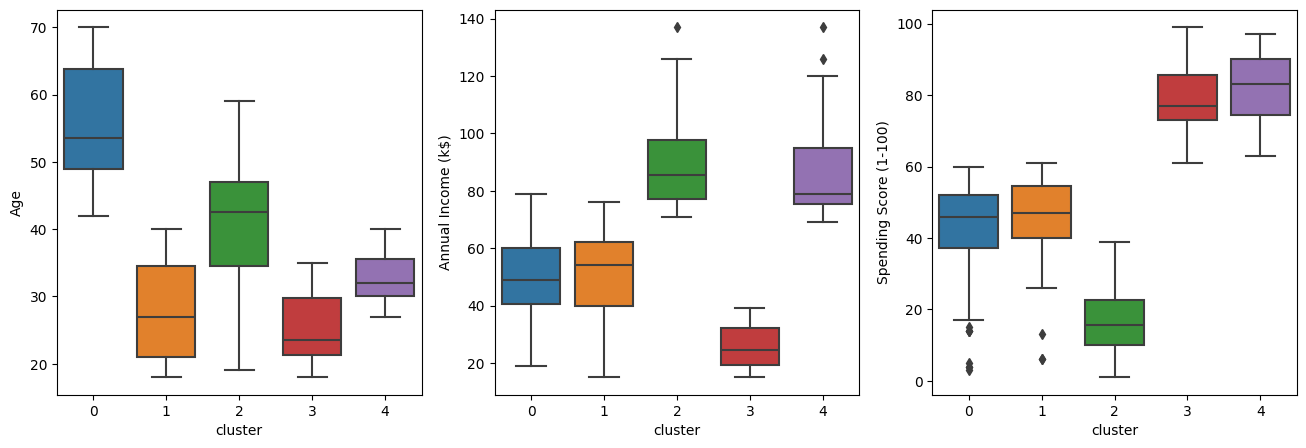

In [9]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# Criando a figura com 1 linha e 3 colunas 
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))

# Percorrendo cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo 
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x os clusters, eixo y as colunas e ax o sistema de eixos
    sns.boxplot(data = df_clustered, x = "cluster", y = col, ax = ax)

# Exibindo o gráfico    
plt.show()

## Criando um perfil para cada Cluster com base no gráfico BoxPlot
``Fazendo a personificação dos Clusters após a Redução de Dimensionalidade``

- Cluster 0 - pontuação de gastos moderada, renda moderada, idade alta
- Cluster 1 - pontuação de gastos moderada, renda moderada, idade jovem
- Cluster 2 - pontuação de gastos baixa, renda alta, idade moderada
- Cluster 3 - pontuação de gastos alta, renda baixa, idade jovem
- Cluster 4 - pontuação de gastos alta, renda alta, idade jovem

Transformando os pontos acima em uma tabela

| Pontuação de Gastos | Renda | Idade | Cluster |
|---------------------|-------|-------|---------|
| Moderada            | Moderada | Alta | 0       |
| Moderada            | Moderada | Jovem | 1       |
| Baixa               | Alta  | Moderada | 2       |
| Alta                | Baixa | Jovem | 3       |
| Alta                | Alta  | Jovem | 4       |

## Comparando com o BoxPlot anterior
- Sem a Redução de Dimensionalidade

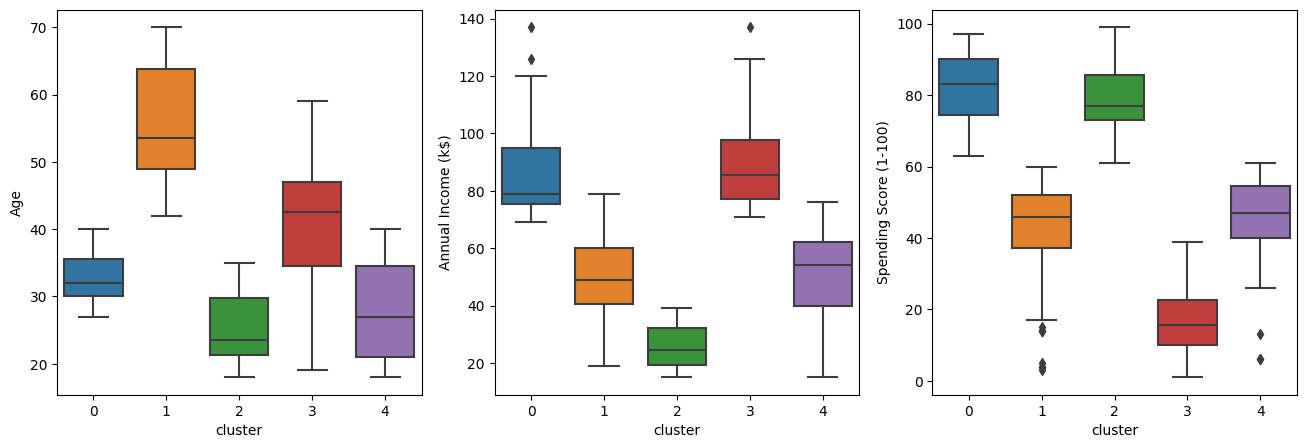


## Verificando se cada Cluster tem uma quantidade de clientes significativa

In [10]:
# Verificando a quantidade de clientes em cada cluster
# Obs.1: usando o .value_counts() para fazer a contagem 
# Obs.2: usando o .sort_index() para classificar 
df_clustered["cluster"].value_counts().sort_index()

0    58
1    47
2    34
3    22
4    39
Name: cluster, dtype: int64

## Analisando os Clusters por Generos

### Quantidade de clientes de cada genero por cluster:

In [11]:
# Fazendo o agrupamento da quantidade de clientes por cluster e por genero
# Obs.: usando o parâmetros .size() para obter a quantidade
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    33
         Male      25
1        Female    31
         Male      16
2        Female    14
         Male      20
3        Female    13
         Male       9
4        Female    21
         Male      18
dtype: int64

## Visualizando no BoxPlot os Clusters por Generos

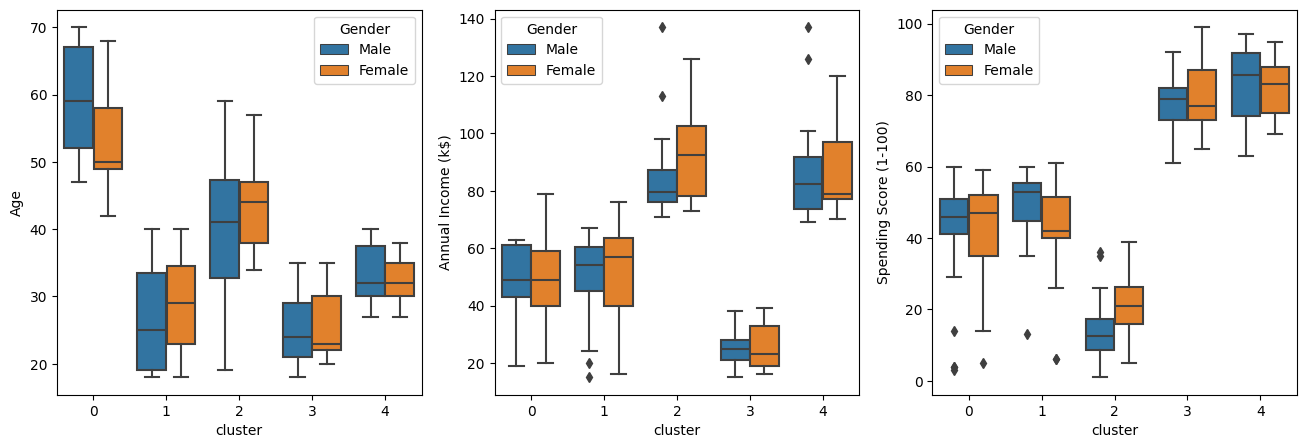

In [12]:
# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 5))

# Percorrendo cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo
for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x os clusters, eixo y as colunas, o ax o sistema de eixos e o hue para o Gender
    sns.boxplot(data = df_clustered, x = "cluster", y = col, ax = ax, hue = "Gender")

# Exibindo o gráfico    
plt.show()

## Preparando para fazer o Gráfico em 3 Dimensões

In [13]:
# Visualizando os Nomes das Colunas (Features, Variáveis) de Saída do pré-processamento
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [14]:
# Visualizando os "pesos" de cada um dos parãmetros tem para os 3 componentes
pipeline["pca"].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [-0.70661643, -0.00434967, -0.70753413,  0.00590595, -0.00590595]])

In [15]:
# Visualizando os Nomes das Colunas (Features, Variáveis) de Saída dos 3 componentes
pipeline["pca"].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [16]:
# Visualizando os valores dos centros dos clusters das 3 coordenadas para os 5 clusters
pipeline["clustering"].cluster_centers_

array([[ 1.09281997, -0.42702742, -0.61346816],
       [-0.39283157, -0.42287385,  0.70807382],
       [ 1.00944112,  1.11828568,  0.78954352],
       [-1.4357643 , -1.37856558, -0.10638215],
       [-1.2219143 ,  0.94742028, -0.56929202]])

In [17]:
# Pegando o Pipeline até a Penúltima Etapa (Pré-processamento + PCA)
# Obs.1: -1 significa a última, mas está sendo utilizado um slice [:-1]
# Obs.2: a penúltima etapa é o PCA
pipeline[:-1]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42))])

In [18]:
# Visualizando os Nomes das Colunas (Features, Variáveis) de Saída dos 3 componentes até a penúltima etapa
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [19]:
# Criando um Novo DataFrame a partir do DataFrame Original com o Resultado do Pré-processamento + PCA (sem o Treinamento do Modelo)
df_pca = pd.DataFrame(
    # Fazendo o fit
    pipeline[:-1].fit_transform(df),
    # Pegando as Colunas que vieram da saída do Pipeline até a Penúltima Etapa
    columns = pipeline[:-1].get_feature_names_out()
)

# Exibindo as 5 primeiras linhas do DataFrame
# Obs.: Esse é o resultado do Pré-processamento + PCA (sem o Treinamento do Modelo)
df_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,1.315210
1,-1.623595,-1.726481,0.060149
2,0.279614,-1.725314,2.182574
3,-1.511064,-1.796205,0.080242
4,-0.095468,-1.707347,0.690684


In [20]:
# Atribuindo as 03 coordenadas dos centros dos clusters à variável "centroids"
centroids = pipeline["clustering"].cluster_centers_

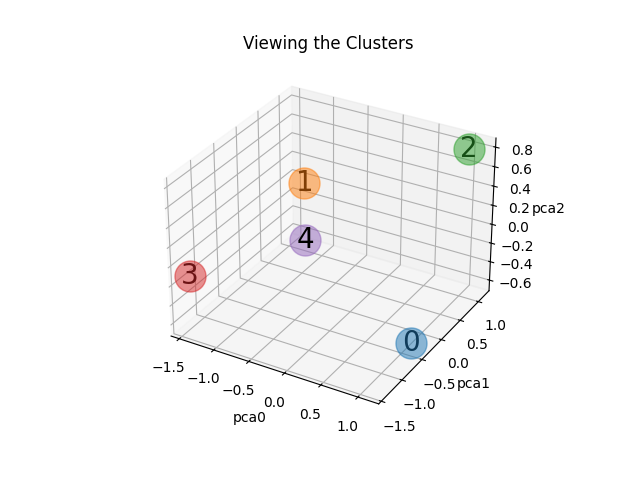

In [23]:
# Descomente para interatividade
# %matplotlib ipympl

# Importando a Função genérica criada para a visualização de clusters
from funcoes_auxiliares import visualizar_clusters

# Chamando a função passando alguns parâmetros
visualizar_clusters(
    # Passando como parâmetros para o dataframe o df_scaled que foi obtido no pré-processamento + pca
    dataframe = df_pca,
    # Passando como parâmetro as 3 colunas oriundas do pré-processamento + pca
    colunas = ['pca0', 'pca1', 'pca2'],
    # Passando como parâmetro quantidade de cores a quantidade de clusters que foi definida
    quantidade_cores = 5,
    # Passando como parâmetro centroids a variável centroids definida
    centroids = centroids,
)

### Observação:
- Nota-se que foi possível separar os 5 Clusters mesmo tendo excluído as informações dos generos

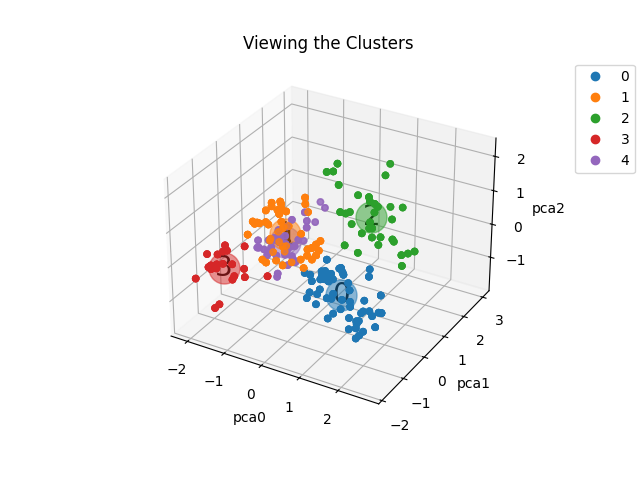

In [24]:
# Importando a Função genérica criada para a visualização de clusters
from funcoes_auxiliares import visualizar_clusters

# Chamando a função passando mais alguns parâmetros
visualizar_clusters(
    # Passando como parâmetros para o dataframe o df_scaled que foi obtido no pré-processamento + pca
    dataframe = df_pca,
    # Passando como parâmetro as 3 colunas oriundas do pré-processamento + pca
    colunas = ['pca0', 'pca1', 'pca2'],
    # Passando como parâmetro quantidade de cores a quantidade de clusters que foi definida
    quantidade_cores = 5,
    # Passando como parâmetro centroids a variável centroids definida
    centroids = centroids,
    # Passando o parâmetro para exibição dos pontos
    mostrar_pontos = True,
    # Passando como parâmetro a coluna "cluster" do DataFrame clusterizado "df_clustered"
    coluna_clusters = df_clustered["cluster"]
)